In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Educative/Advanced_DL_and_NLP_projects/IMDB_Reviews_Sentiment_Analysis'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset
Here we choose specifically $num\_words = 10000$, i.e the first 10000 words in the dictionary of the **IMDB** dataset.

In [35]:
((X_train, Y_train), (X_test, Y_test)) = imdb.load_data(num_words=30000)

In [36]:
print('X_train: {}'.format(X_train.shape))
print('Y_train: {}'.format(Y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('Y_test: {}'.format(Y_test.shape))

X_train: (25000,)
Y_train: (25000,)
X_test: (25000,)
Y_test: (25000,)


## Data Representation
- $X_{train}$ is (25000,) vector where $X_{train}[i]$ contains $i^{th}$ review.

- Each review is a list of of numbers. This depicts the numeric representation of the words.

In [37]:
print('The first review contains {} words.'.format(len(X_train[0])))
print('The second review contains {} words.'.format(len(X_train[1])))
print('The tenth review contains {} words.'.format(len(X_train[9])))

The first review contains 218 words.
The second review contains 189 words.
The tenth review contains 130 words.


Min words count: 11
Max words count: 2494
Average words count: 238.71364


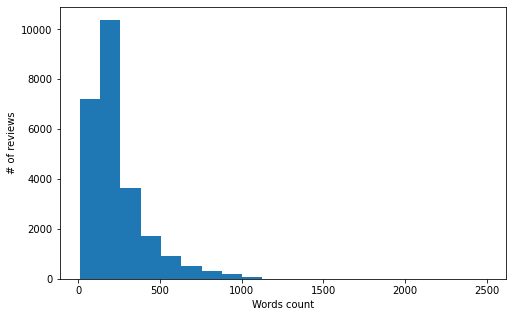

In [38]:
reviews_length = np.array([len(review) for review in X_train])

plt.figure(figsize=(8,5))
plt.hist(reviews_length, 20)
plt.xlabel('Words count')
plt.ylabel('# of reviews')
print('Min words count: {}'.format(np.min(reviews_length)))
print('Max words count: {}'.format(np.max(reviews_length)))
print('Average words count: {}'.format(np.mean(reviews_length)))

## Converting numeric representation to actual text

In [39]:
word_idx = imdb.get_word_index()
idx_word = dict([value, key] for (key, value) in word_idx.items())
# '?' means there is no word in the imdb dictionary.
actual_review = ' '.join([idx_word.get(idx-3, '?') for idx in X_train[0]])
print('Review: ' + actual_review)
print('Length of the review: {}'.format(len(actual_review.split())))

Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

## Padding operation

In [40]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

print('X_train after padding: {}'.format(X_train.shape))
print('X_test after padding: {}'.format(X_test.shape))

X_train after padding: (25000, 500)
X_test after padding: (25000, 500)


## Model Architecture


In [45]:
def build_model():
  model = Sequential()

  model.add(Embedding(30000, 64)) # 30000 is the size of our dictionary
  model.add(SimpleRNN(32))
  model.add(Dense(1, activation='sigmoid'))

  print(model.summary())

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

  return model

model = build_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          1920000   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,923,137
Trainable params: 1,923,137
Non-trainable params: 0
_________________________________________________________________
None


## Training


In [46]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only= False)
earlystop = EarlyStopping(monitor='val_acc', patience=5)


In [47]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=128, callbacks=[checkpoint, earlystop])

Epoch 1/20
157/157 [==============================] - 32s 199ms/step - loss: 0.6604 - acc: 0.5853 - val_loss: 0.5439 - val_acc: 0.7442
Epoch 2/20
157/157 [==============================] - 31s 194ms/step - loss: 0.3731 - acc: 0.8429 - val_loss: 0.4563 - val_acc: 0.7880
Epoch 3/20
157/157 [==============================] - 36s 229ms/step - loss: 0.2021 - acc: 0.9247 - val_loss: 0.3742 - val_acc: 0.8484
Epoch 4/20
157/157 [==============================] - 31s 198ms/step - loss: 0.0911 - acc: 0.9710 - val_loss: 0.4029 - val_acc: 0.8644
Epoch 5/20
157/157 [==============================] - 29s 183ms/step - loss: 0.0395 - acc: 0.9888 - val_loss: 0.5170 - val_acc: 0.8198
Epoch 6/20
157/157 [==============================] - 29s 185ms/step - loss: 0.0166 - acc: 0.9959 - val_loss: 0.5692 - val_acc: 0.8306
Epoch 7/20
157/157 [==============================] - 29s 185ms/step - loss: 0.0123 - acc: 0.9965 - val_loss: 0.9250 - val_acc: 0.7114
Epoch 8/20
157/157 [==============================] - 2

## Visualize results

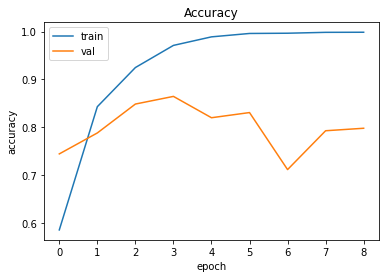

In [55]:
acc, val_acc = hist.history['acc'], hist.history['val_acc']
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

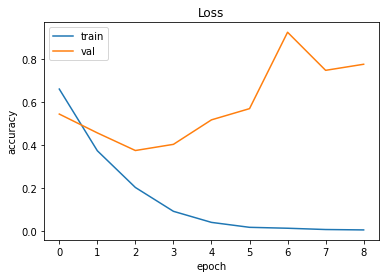

In [56]:
acc, val_acc = hist.history['loss'], hist.history['val_loss']
plt.plot(acc)
plt.plot(val_acc)
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [62]:
Y_pred = model.predict(X_test, steps=128, verbose=0)
Y_pred = np.round(Y_pred)

In [63]:
from sklearn.metrics import confusion_matrix
import itertools

In [64]:
cm = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

In [65]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
          horizontalalignment="center",
          color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[9980 2520]
 [2699 9801]]


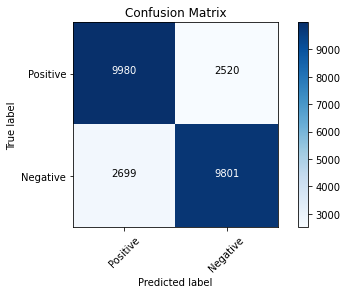

In [68]:
cm_plot_labels = ['Positive', 'Negative']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [72]:
Y_pred = np.max(Y_pred, axis=-1)

In [73]:
test_accuracy = np.mean(Y_test == Y_pred)
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

Test accuracy: 79.12%
